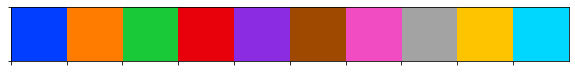

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/pcm-dpc/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 99513  100 99513    0     0  99513      0  0:00:01 --:--:--  0:00:01  194k


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN
5,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148,NaN,NaN
6,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,0,58,NaN,NaN
7,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,3,124,NaN,NaN
8,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
9,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,172,1463,NaN,NaN


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates
tests = pd.DataFrame(columns = ["data"])
tests["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
conf.index = pd.to_datetime(conf.index).date
deaths.set_index('data', inplace=True)
deaths.index = pd.to_datetime(deaths.index).date
tests.set_index('data', inplace=True)
tests.index = pd.to_datetime(tests.index).date

conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
2020-04-06,1721,287,817,3058,17556,2103,4031,4549,51534,4614,...,1722,2348,12924,2444,922,2046,6001,1253,805,11588
2020-04-07,1799,291,833,3148,17825,2153,4149,4757,52325,4710,...,1811,2476,13343,2514,935,2097,6173,1263,835,11925
2020-04-08,1859,297,859,3268,18234,2218,4266,4906,53414,4859,...,1835,2602,13883,2634,975,2159,6379,1289,850,12410
2020-04-09,1931,303,874,3344,18677,2299,4429,5020,54802,4955,...,1903,2708,14522,2716,1026,2232,6552,1298,868,12933
2020-04-10,2014,308,901,3442,19128,2349,4583,5191,56048,5084,...,1955,2816,15012,2809,1063,2302,6727,1302,879,13421


In [5]:
# select only countries with > 200 positive COVID-19 cases
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Lombardia         56048
Emilia-Romagna    19128
Piemonte          15012
Veneto            13421
Toscana            6727
Liguria            5191
Marche             5084
Lazio              4583
Campania           3442
P.A. Trento        2816
dtype: int64


In [6]:
# latest number of cases by region
print(conf.max())

Abruzzo                   2014
Basilicata                 308
Calabria                   901
Campania                  3442
Emilia-Romagna           19128
Friuli Venezia Giulia     2349
Lazio                     4583
Liguria                   5191
Lombardia                56048
Marche                    5084
Molise                     243
P.A. Bolzano              1955
P.A. Trento               2816
Piemonte                 15012
Puglia                    2809
Sardegna                  1063
Sicilia                   2302
Toscana                   6727
Umbria                    1302
Valle d'Aosta              879
Veneto                   13421
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

In [8]:
def make_plot(dataset="", contries_ordered="", plot_countries_opt=1,
              nrow=2,ncol=2,plot_countries_option = 1, title="", 
              xlabel="", ylabel="", logy=False, logx=False):
    count=0
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

    for r in range(nrow):
        for c in range(ncol):
            if plot_countries_opt == 1:
                plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered)].index
            else:
                plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered)]
                
            dataset[plot_countries].plot(logy=logy, logx=logx, grid=True, ax=axes[r,c], title=title, figsize = (20,10))
            axes[r,c].set_xlabel(xlabel, fontsize=15)
            axes[r,c].set_ylabel(ylabel, fontsize=15)
            count+=1

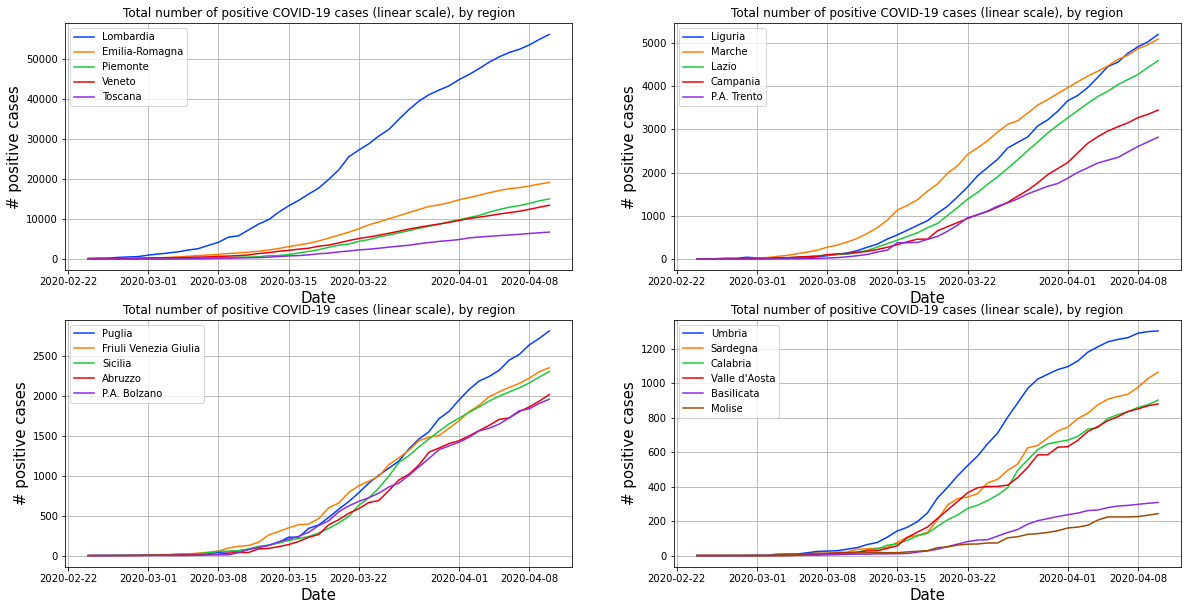

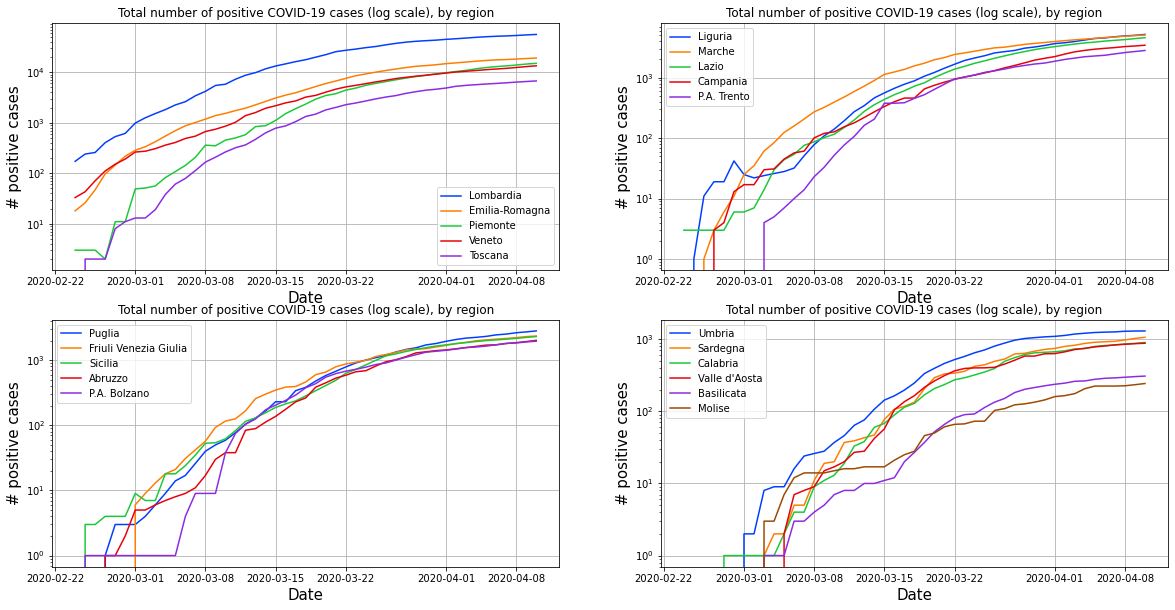

In [9]:
make_plot(dataset=conf, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (linear scale), by region',
          xlabel="Date", ylabel="# positive cases")

make_plot(dataset=conf, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (log scale), by region',
          xlabel="Date", ylabel="# positive cases",
         logy=True)

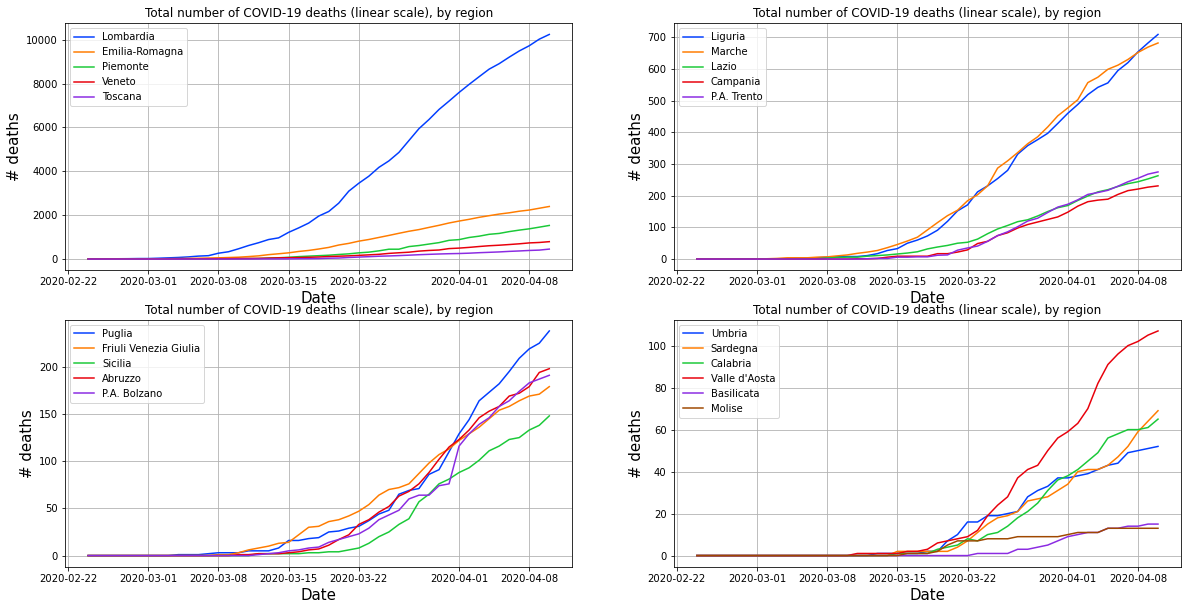

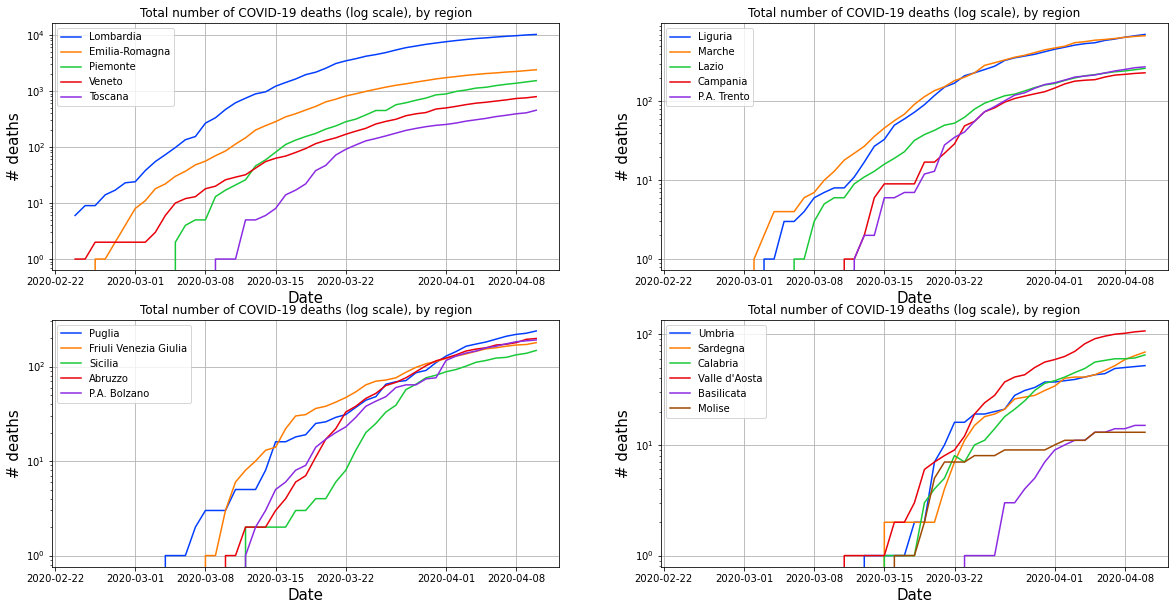

In [10]:
make_plot(dataset=deaths, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of COVID-19 deaths (linear scale), by region',
          xlabel="Date", ylabel="# deaths")

make_plot(dataset=deaths, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of COVID-19 deaths (log scale), by region',
          xlabel="Date", ylabel="# deaths",
         logy=True)

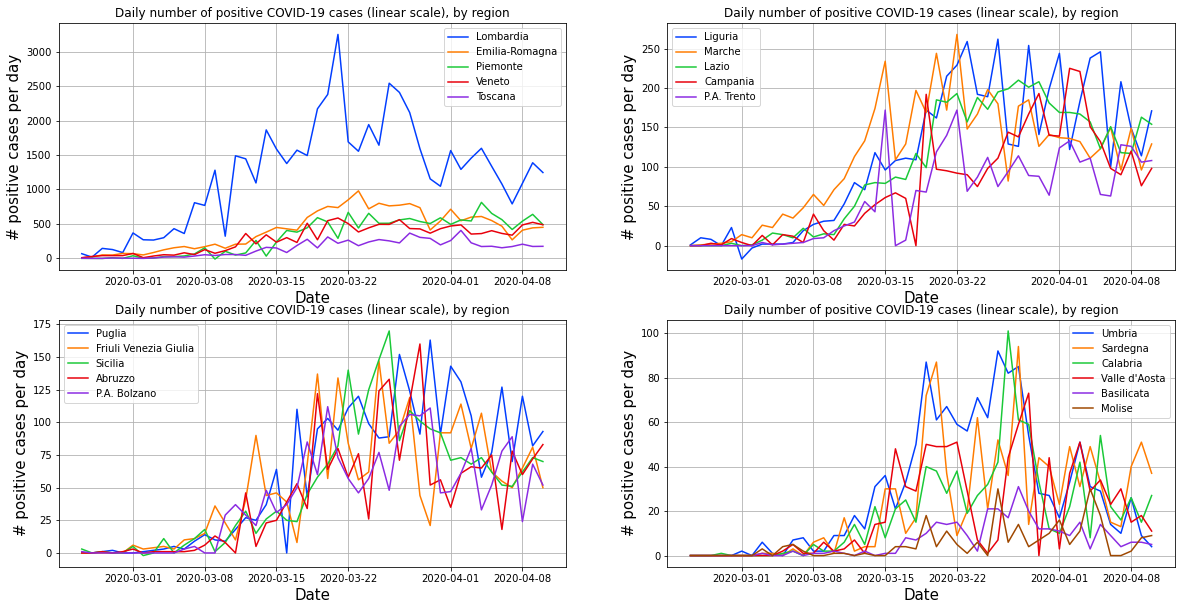

In [11]:
conf_daily = conf - conf.shift(1)

make_plot(dataset=conf_daily, nrow=2,ncol=2, contries_ordered=contries_ordered, 
          title='Daily number of positive COVID-19 cases (linear scale), by region',
          xlabel="Date", ylabel="# positive cases per day")

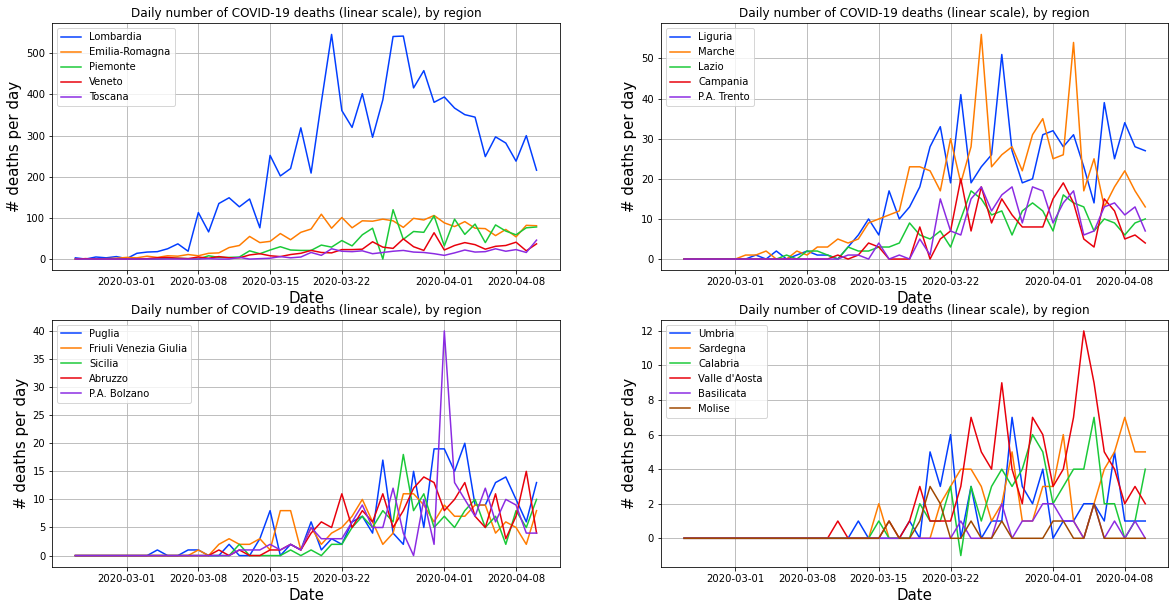

In [12]:
deaths_daily = deaths - deaths.shift(1)

make_plot(dataset=deaths_daily, nrow=2,ncol=2, contries_ordered=contries_ordered, 
          title='Daily number of COVID-19 deaths (linear scale), by region',
          xlabel="Date", ylabel="# deaths per day")

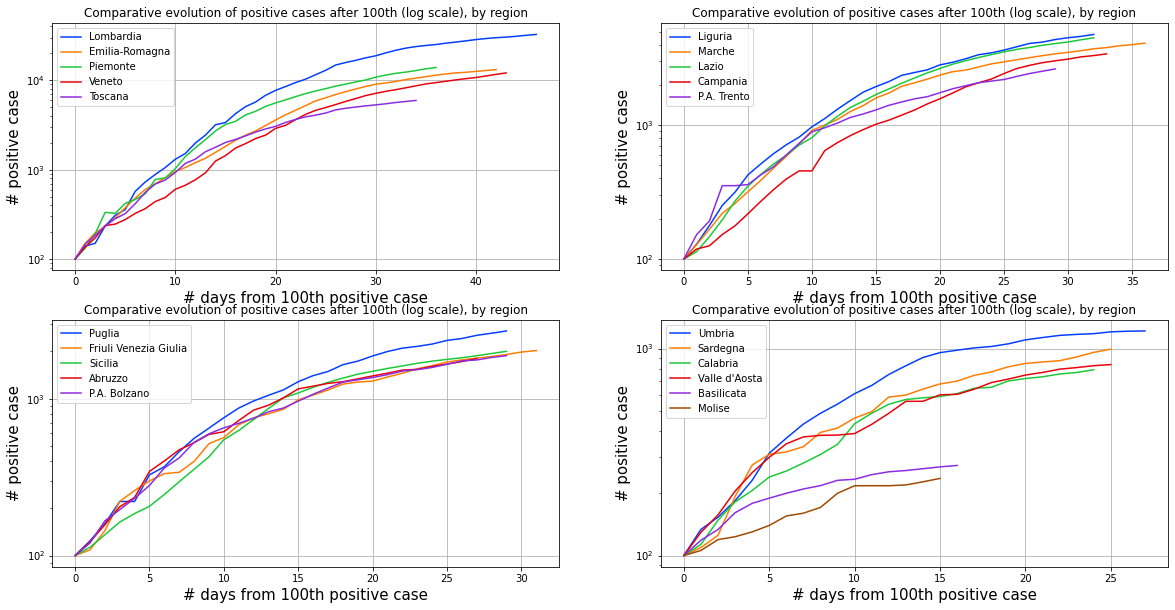

In [13]:
count_after = 100
conf_align_start = conf[conf > count_after]
conf_align_start = conf_align_start.apply(lambda x: pd.Series(x.dropna().values))
conf_align_start = conf_align_start.loc[:].div(conf_align_start.iloc[0][:]/count_after) # normalize to same start

make_plot(dataset=conf_align_start, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Comparative evolution of positive cases after 100th (log scale), by region',
          xlabel="# days from 100th positive case", ylabel="# positive case",
         logy=True)

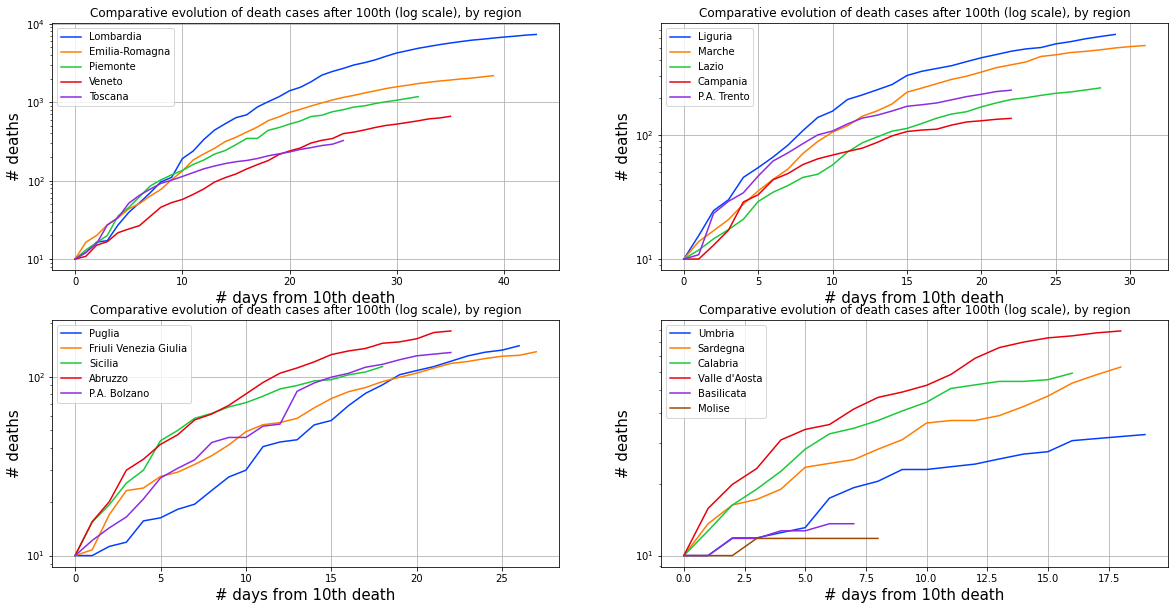

In [14]:
count_after = 10
deaths_align_start = deaths[deaths > count_after] 
deaths_align_start = deaths_align_start.apply(lambda x: pd.Series(x.dropna().values))
deaths_align_start = deaths_align_start.loc[:].div(deaths_align_start.iloc[0][:]/count_after)

make_plot(dataset=deaths_align_start, nrow=2,ncol=2, contries_ordered=contries_ordered, 
          title='Comparative evolution of death cases after 100th (log scale), by region',
          xlabel="# days from 10th death", ylabel="# deaths",
          logy=True)

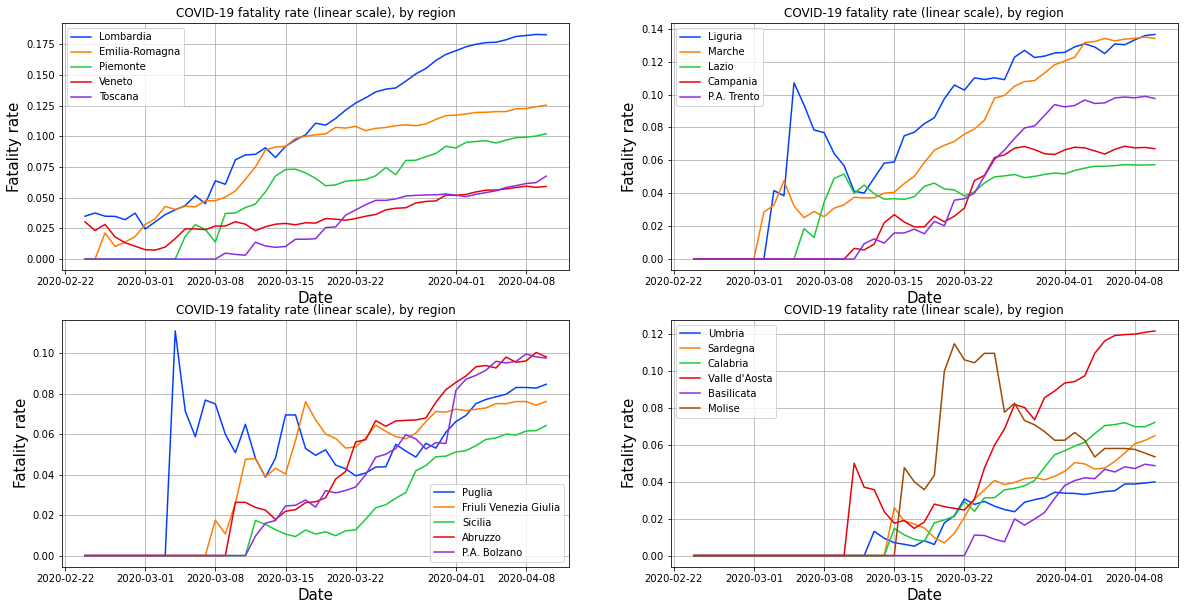

In [15]:
fatality = deaths.divide(conf.replace(0, 1))

make_plot(dataset=fatality, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='COVID-19 fatality rate (linear scale), by region',
          xlabel="Date", ylabel="Fatality rate")

In [16]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [17]:
# rename population country names that don't match COVID-19 data
# population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
population = population.replace("Valle d'Aosta / Vallée d'Aoste", "Valle d\'Aosta")
print(population["Territory"])

0       Bologna
1       Bologna
2       Bologna
3       Bologna
4       Bologna
         ...   
3397    Trieste
3398    Venezia
3399    Venezia
3400     Verona
3401     Verona
Name: Territory, Length: 3402, dtype: object


In [18]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population = population.loc[:,~population.columns.duplicated()]

In [19]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf_population_norm = pd.concat([population,conf])
conf_population_norm.head()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia-Romagna,Toscana,Umbria,Marche,...,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna,P.A. Bolzano,P.A. Trento
0,4.39384e+06,128664,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,917784,1.59126e+06,...,1.31404e+06,308967,5.84041e+06,4.09045e+06,573458,1.93658e+06,5.1511e+06,1.64133e+06,NaN,NaN
2020-02-24,3,0,0,172,33,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2020-02-25,3,0,1,240,43,0,26,2,0,0,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-26,3,0,11,258,71,0,47,2,0,1,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-27,2,0,19,403,111,0,97,2,0,3,...,1,0,3,1,0,0,4,0,1.0,0.0


In [20]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf_population_norm = conf_population_norm.loc[:].div(conf_population_norm.iloc[0][:]/10/1e3)

In [21]:
# remove population row
conf_population_norm = conf_population_norm.iloc[1:]
conf_population_norm.dropna(axis=1, inplace=True)
conf_population_norm.tail()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia-Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna
2020-04-06,29.4139,62.5661,28.3298,52.5462,23.3867,17.0005,39.46,15.9598,13.6524,28.9958,7.09748,13.097,7.24997,5.23594,5.97489,5.00473,4.21878,3.97197,5.61739
2020-04-07,30.3675,64.8977,29.6252,53.3527,24.0668,17.4047,40.0646,16.4172,13.7614,29.5991,7.30524,13.6906,7.24997,5.39003,6.14602,5.07448,4.3014,4.07098,5.6966
2020-04-08,31.5965,66.0635,30.5531,54.4631,25.0457,17.9301,40.9839,16.9651,14.0447,30.5355,7.51125,14.1472,7.3147,5.5955,6.43939,5.17911,4.43566,4.19134,5.9403
2020-04-09,33.0508,67.4625,31.2631,55.8784,26.1012,18.5849,41.9796,17.4252,14.1428,31.1387,7.79824,14.6951,7.57362,5.72563,6.63985,5.28373,4.51312,4.33306,6.25102
2020-04-10,34.166,68.3175,32.328,57.1488,27.086,18.9891,42.9933,17.8906,14.1863,31.9494,8.0694,15.3267,7.86492,5.89342,6.86721,5.37093,4.65254,4.46895,6.47645


In [22]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

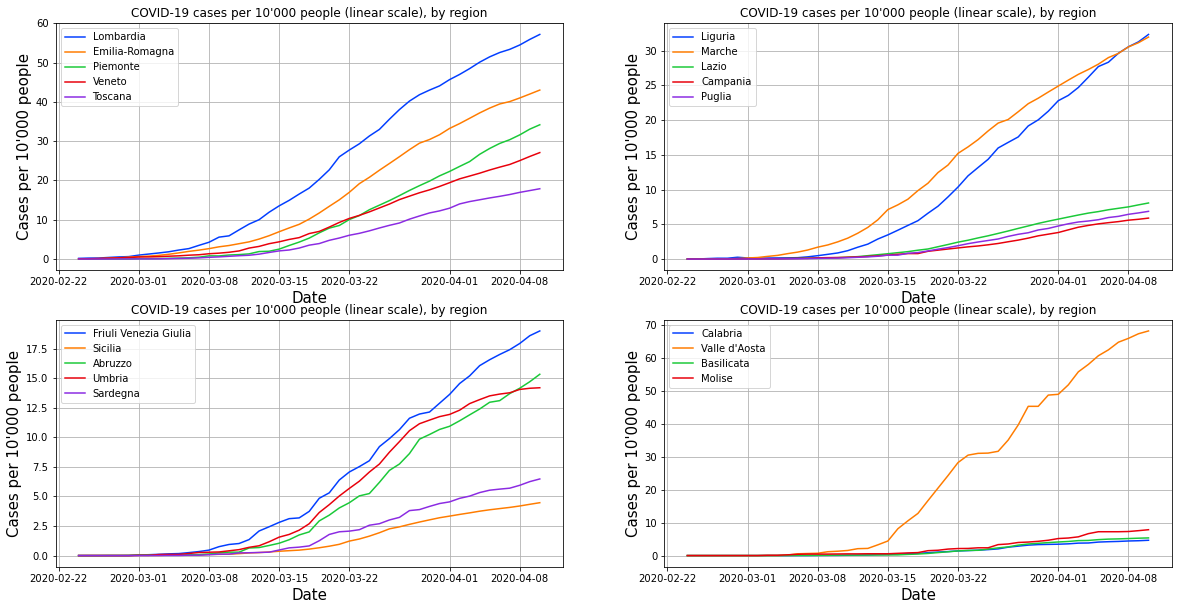

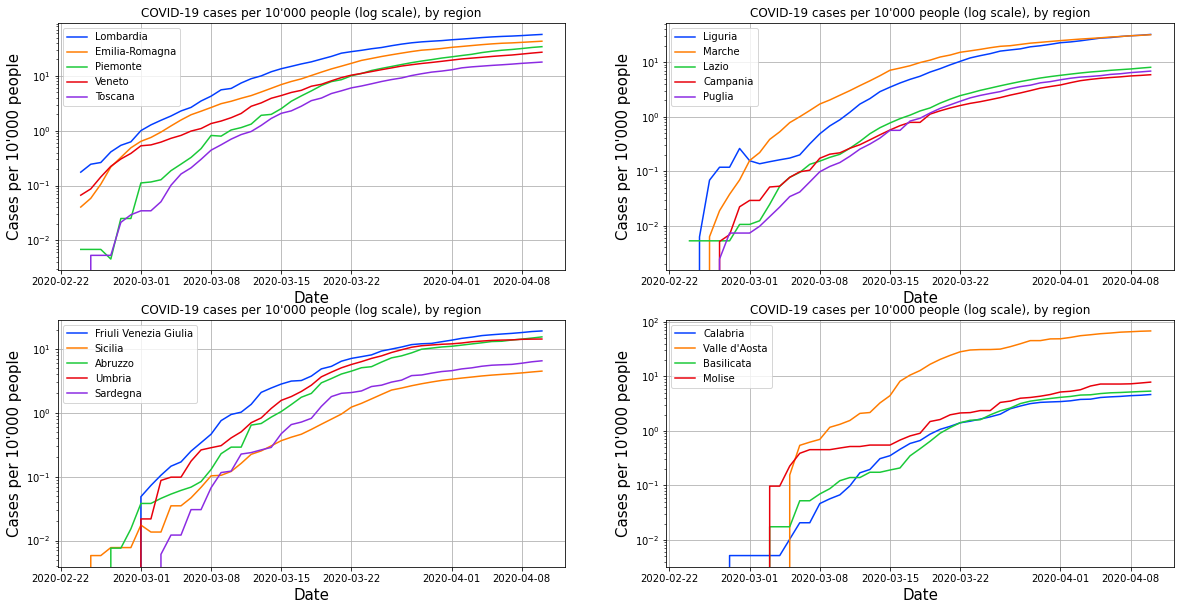

In [23]:
make_plot(dataset=conf_population_norm, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="COVID-19 cases per 10'000 people (linear scale), by region",
          xlabel="Date", ylabel="Cases per 10'000 people")

make_plot(dataset=conf_population_norm, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="COVID-19 cases per 10'000 people (log scale), by region",
          xlabel="Date", ylabel="Cases per 10'000 people",
         logy=True)

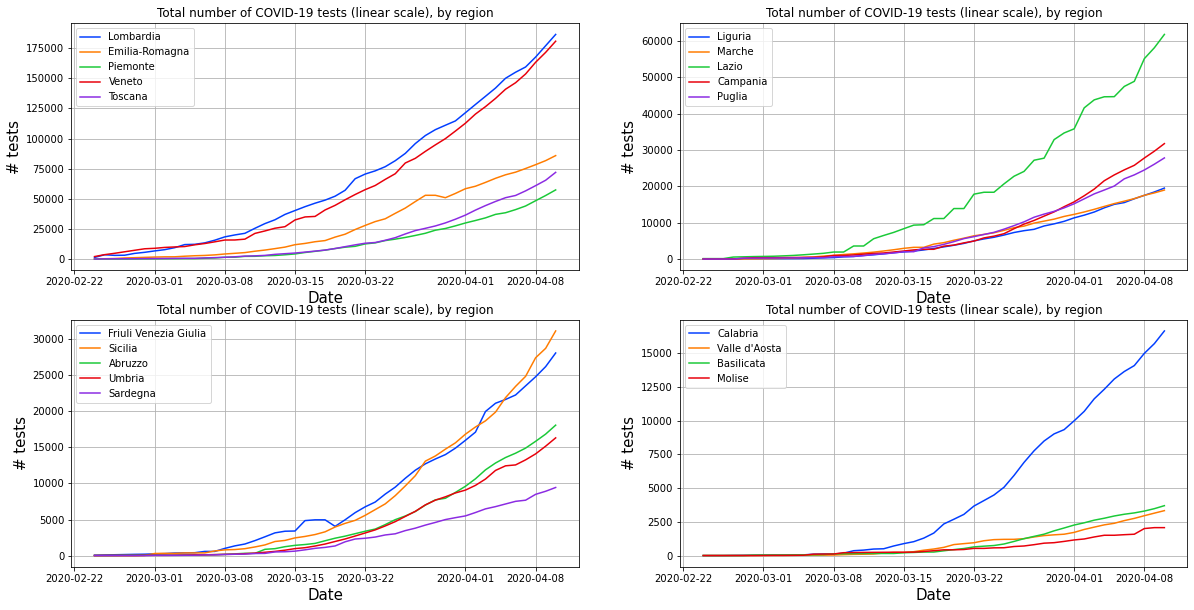

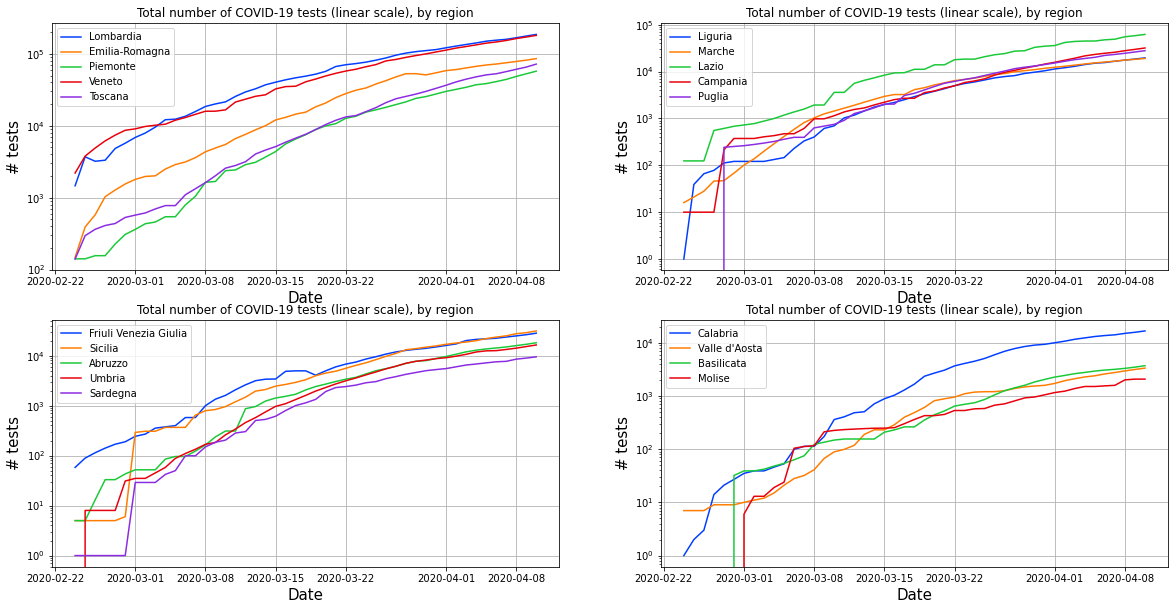

In [24]:
make_plot(dataset=tests, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Total number of COVID-19 tests (linear scale), by region",
          xlabel="Date", ylabel="# tests")

make_plot(dataset=tests, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Total number of COVID-19 tests (linear scale), by region",
          xlabel="Date", ylabel="# tests",
         logy=True)

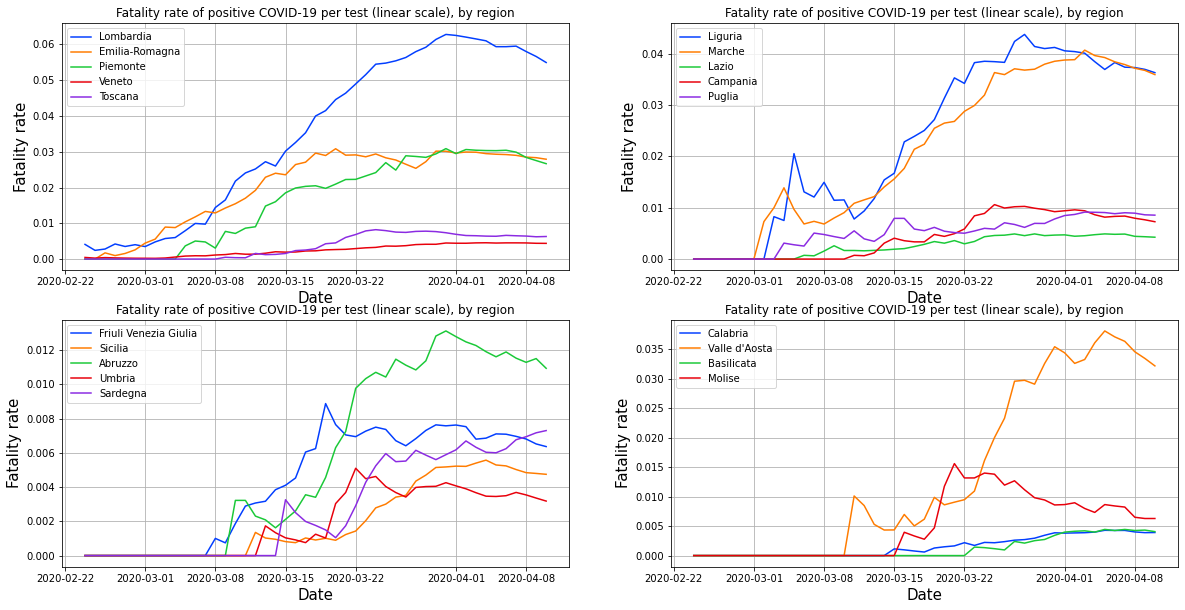

In [25]:
fatality_per_test = deaths.divide(tests.replace(0, 1))

make_plot(dataset=fatality_per_test, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Fatality rate of positive COVID-19 per test (linear scale), by region",
          xlabel="Date", ylabel="Fatality rate")

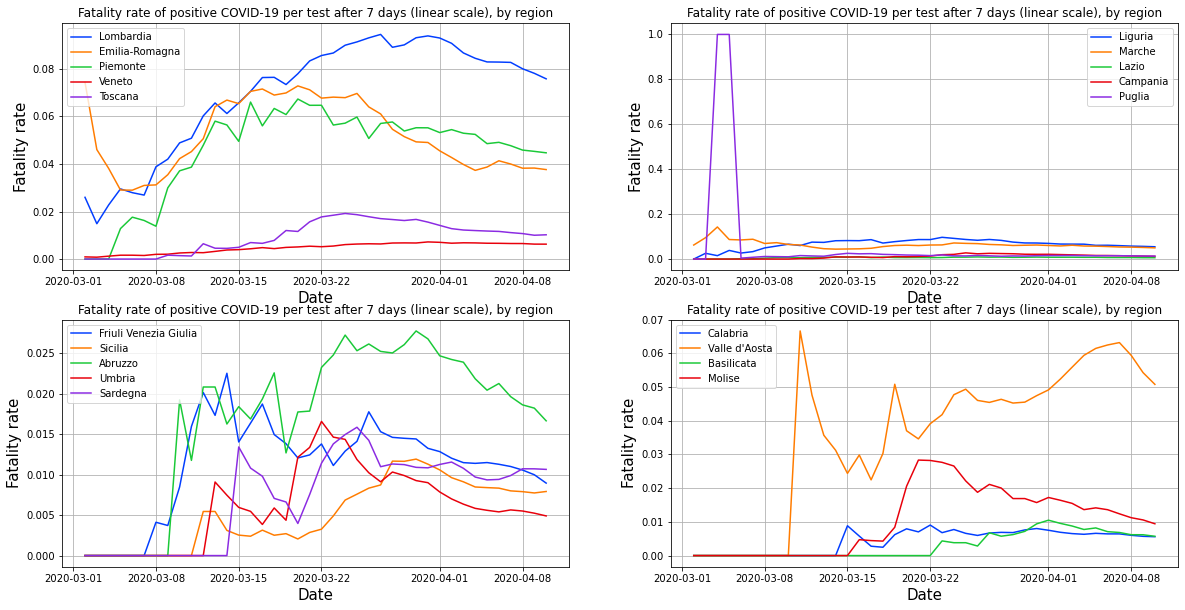

In [26]:
tests_7d_ago = tests[tests.columns.values].shift(7)
tests_7d_ago = tests_7d_ago.dropna()

fatality_after_7d_per_test = deaths.divide(tests_7d_ago.replace(0, 1))

make_plot(dataset=fatality_after_7d_per_test, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Fatality rate of positive COVID-19 per test after 7 days (linear scale), by region",
          xlabel="Date", ylabel="Fatality rate")

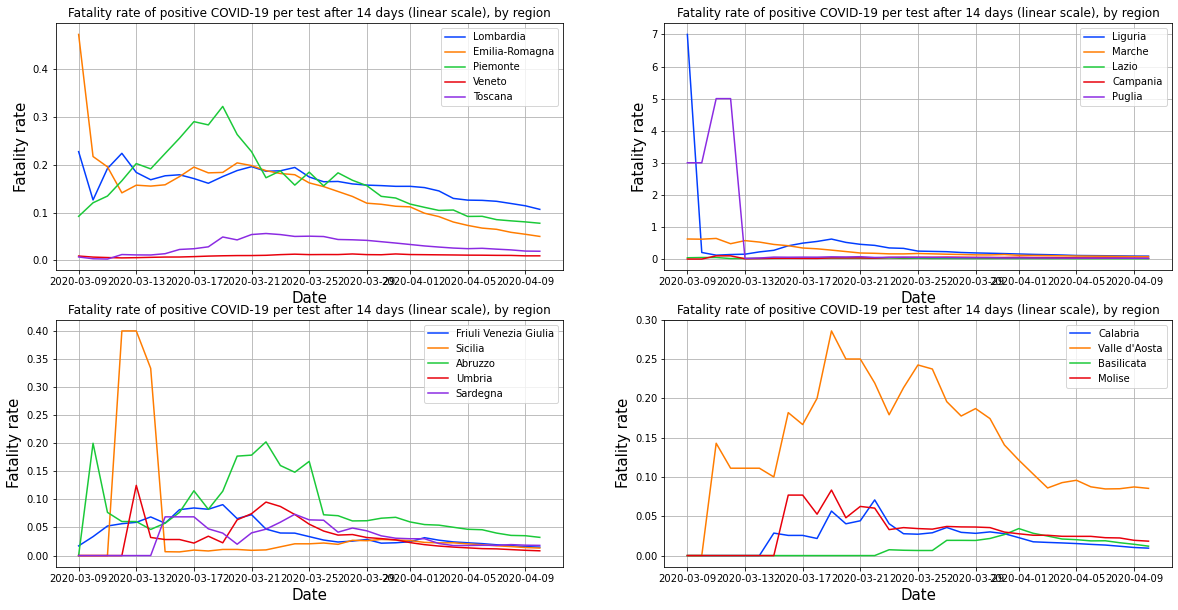

In [27]:
tests_14d_ago = tests[tests.columns.values].shift(14)
tests_14d_ago = tests_14d_ago.dropna()

fatality_after_14d_per_test = deaths.divide(tests_14d_ago.replace(0, 1))

make_plot(dataset=fatality_after_14d_per_test, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Fatality rate of positive COVID-19 per test after 14 days (linear scale), by region",
          xlabel="Date", ylabel="Fatality rate")